# **Importing Python packages**

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression


In [85]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
df=pd.read_csv("/content/drive/MyDrive/employee.csv")

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [87]:
data=df.copy()
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# **Exploratory Data Analysis**
## **Assumptions:**

**Education:** Lower education status employees were laid off more than with higher education status

**Age:** Older employees were laid off more than younger employees

**Job Satisfaction:** Employees with low satisfaction were laid off than one with higher satisfaction

**Environment Satisfaction:** Employees with low satisfaction were laid off than one with higher satisfaction

**Relationship Satisfaction:** Employees with low satisfaction were laid off than one with higher satisfaction

**Years at company:** Employees who had less work experience in that company were laid off



**Work Life balance:** Employees with poor work life balance were laid off

**Job Involvement:** Employees with lower Job involvement were laid off

**Over Time:** Employees who never worked overtime were laid off


In [ ]:
df.shape

(1470, 35)

# **Data Cleaning**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Checking for Null Values?**

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**Coments:** No  column have null value -found.





In [ ]:
df.head()


,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,No,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,No,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,No,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2


# **Correlation**

<ipython-input-88-bcb8353e6eab>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()['Attrition'].sort_values()


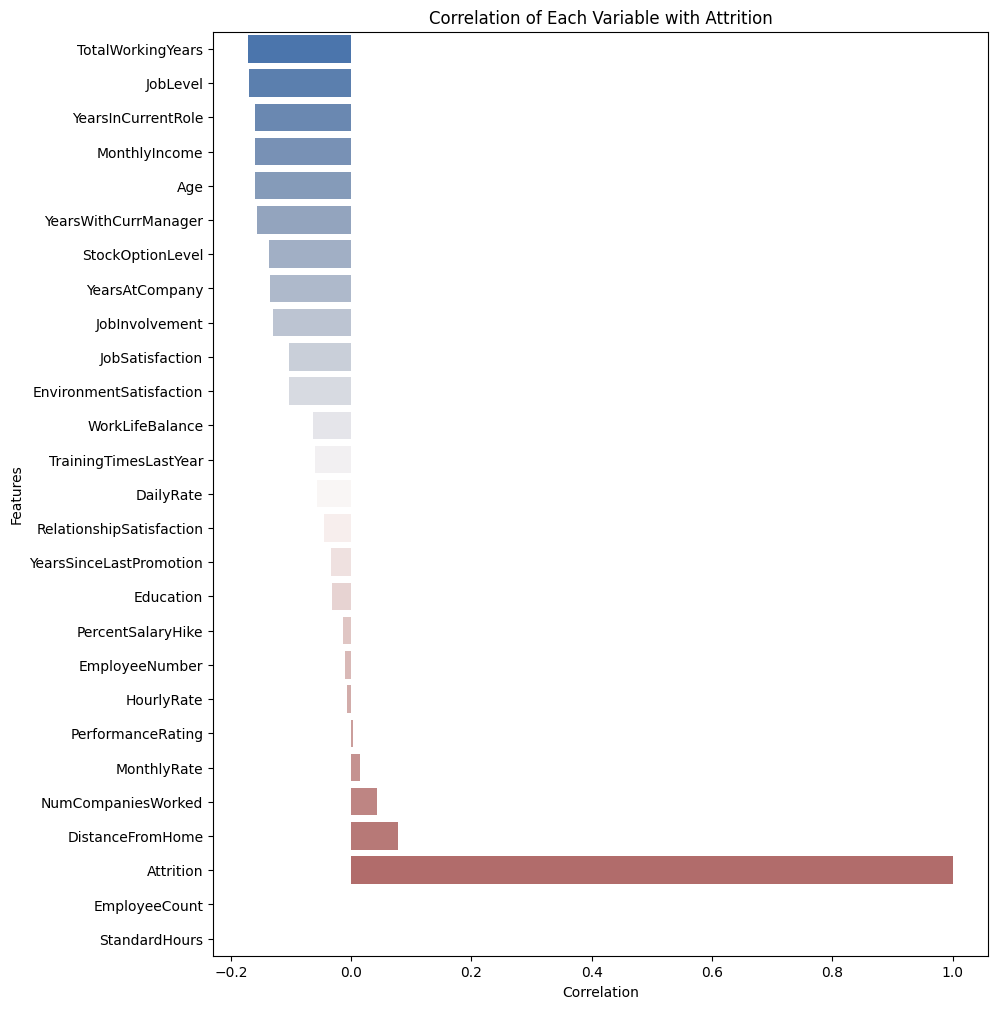

In [88]:
# calculate correlation of each variable with 'Attrition'
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})
correlation = data.corr()['Attrition'].sort_values()

# create a bar plot of the correlations
plt.figure(figsize = (10, 12))
sns.barplot(x = correlation.values, y = correlation.index, orient = 'h', palette = "vlag")
plt.title('Correlation of Each Variable with Attrition')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

# **Removing unncessary  columns**

In [5]:
# Removing unncessary  columns
#data.drop(['Over18' , 'EmployeeCount','StandardHours','EmployeeNumber'],axis=1,inplace = True)

In [89]:
def LabelEncoderfor_column():
 from sklearn.preprocessing import LabelEncoder
 for column in data.columns:
  if data[column].dtype== object:
     data[column] = LabelEncoder().fit_transform(data[column])

 return data.head()

 LabelEncoderfor_column()

In [90]:
LabelEncoderfor_column()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [91]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


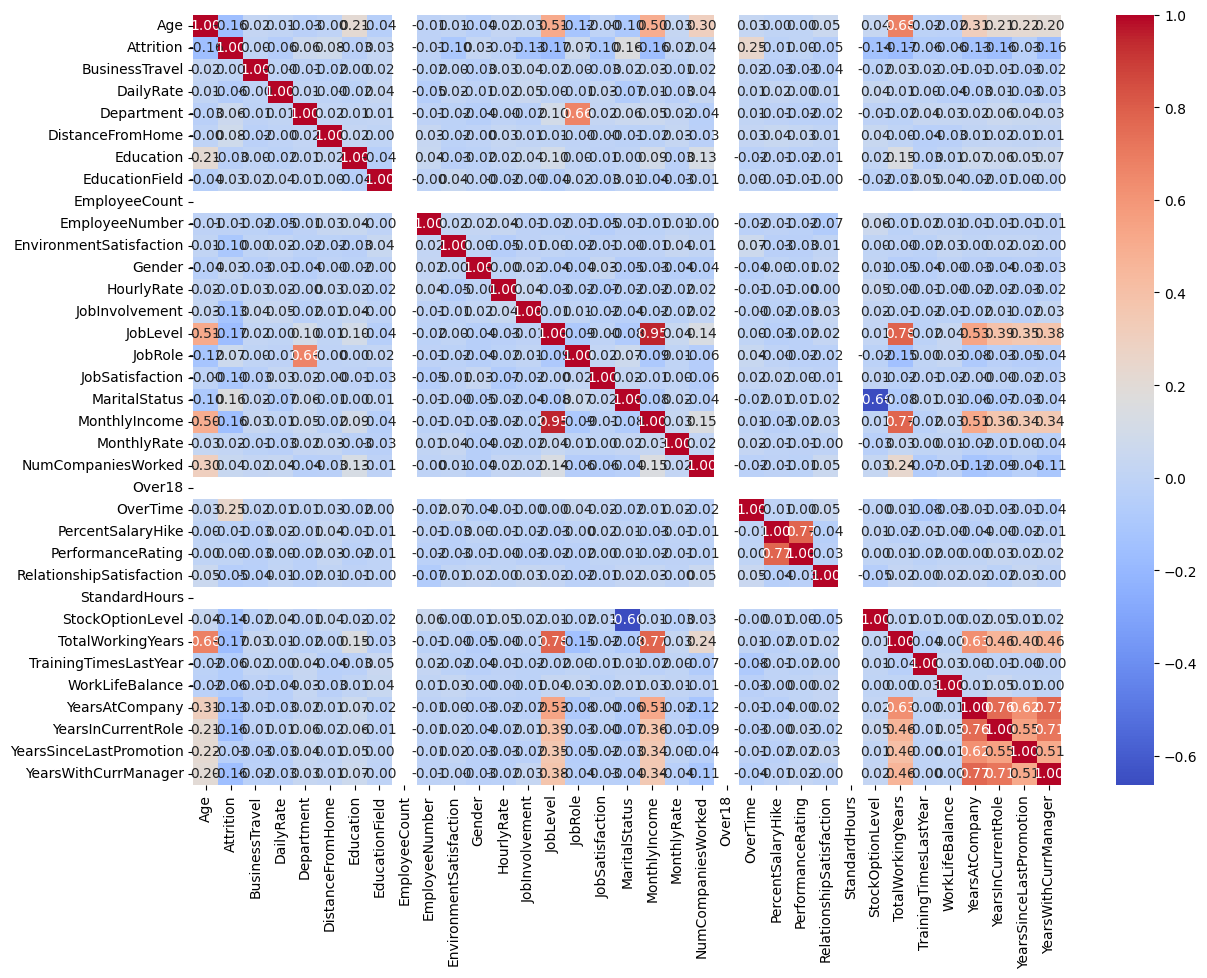

In [92]:
# calculate the correlation matrix
correlation = data.corr()

# plot the correlation matrix using a heatmap
plt.figure(figsize = (14, 10))
sns.heatmap(correlation, annot = True, fmt = ".2f", cmap = 'coolwarm', cbar = True)

plt.show()

In [ ]:
import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df, *['Department', 'Gender'], **{})
chart

In [ ]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['MonthlyRate'], **{})
chart

In [ ]:
plt.style.use('fivethirtyeight')

**Ploting the Relation between Age , Salary**

In [ ]:
data.head()

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,0,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2


# **Model Training**

In [94]:
X = data.drop("Attrition", axis=1)
Y = data["Attrition"]

In [95]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)


Y_test

442     0
1091    0
981     1
785     0
1332    1
       ..
1439    0
481     0
124     1
198     0
1229    0
Name: Attrition, Length: 294, dtype: int64

In [70]:
X_test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
442,36,0,635,2,10,4,3,1,592,2,...,4,80,0,10,3,2,10,3,9,7
1091,33,2,575,1,25,3,1,1,1545,4,...,4,80,0,5,2,3,5,3,0,2
981,35,1,662,2,18,4,2,1,1380,4,...,3,80,1,5,0,2,4,2,3,2
785,40,2,1492,1,20,4,5,1,1092,1,...,4,80,1,14,6,3,11,10,11,1
1332,29,1,459,1,24,2,1,1,1868,4,...,2,80,0,1,3,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,36,2,557,2,3,3,3,1,2024,1,...,3,80,2,10,2,3,9,7,3,4
481,34,2,254,1,1,2,1,1,649,2,...,4,80,1,6,3,3,6,5,1,3
124,31,2,249,2,6,4,1,1,163,2,...,2,80,0,12,3,2,7,7,7,7
198,38,2,1261,1,2,4,1,1,271,4,...,2,80,0,14,3,3,1,0,0,0


In [93]:

Y_train

1374    0
1092    0
768     0
569     0
911     1
       ..
763     0
835     0
1216    0
559     0
684     0
Name: Attrition, Length: 1176, dtype: int64

In [72]:
X_test


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
442,36,0,635,2,10,4,3,1,592,2,...,4,80,0,10,3,2,10,3,9,7
1091,33,2,575,1,25,3,1,1,1545,4,...,4,80,0,5,2,3,5,3,0,2
981,35,1,662,2,18,4,2,1,1380,4,...,3,80,1,5,0,2,4,2,3,2
785,40,2,1492,1,20,4,5,1,1092,1,...,4,80,1,14,6,3,11,10,11,1
1332,29,1,459,1,24,2,1,1,1868,4,...,2,80,0,1,3,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,36,2,557,2,3,3,3,1,2024,1,...,3,80,2,10,2,3,9,7,3,4
481,34,2,254,1,1,2,1,1,649,2,...,4,80,1,6,3,3,6,5,1,3
124,31,2,249,2,6,4,1,1,163,2,...,2,80,0,12,3,2,7,7,7,7
198,38,2,1261,1,2,4,1,1,271,4,...,2,80,0,14,3,3,1,0,0,0


In [96]:
#X_train=X_train.drop("BusinessTravel",axis=1)



In [97]:
X_test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
442,36,0,635,2,10,4,3,1,592,2,...,4,80,0,10,3,2,10,3,9,7
1091,33,2,575,1,25,3,1,1,1545,4,...,4,80,0,5,2,3,5,3,0,2
981,35,1,662,2,18,4,2,1,1380,4,...,3,80,1,5,0,2,4,2,3,2
785,40,2,1492,1,20,4,5,1,1092,1,...,4,80,1,14,6,3,11,10,11,1
1332,29,1,459,1,24,2,1,1,1868,4,...,2,80,0,1,3,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,36,2,557,2,3,3,3,1,2024,1,...,3,80,2,10,2,3,9,7,3,4
481,34,2,254,1,1,2,1,1,649,2,...,4,80,1,6,3,3,6,5,1,3
124,31,2,249,2,6,4,1,1,163,2,...,2,80,0,12,3,2,7,7,7,7
198,38,2,1261,1,2,4,1,1,271,4,...,2,80,0,14,3,3,1,0,0,0


In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train


array([[ 2.3389367 ,  0.595307  , -0.48557354, ..., -1.15684058,
        -0.67381506, -1.15043886],
       [ 0.9043263 ,  0.595307  ,  0.36465323, ..., -0.05481991,
        -0.67381506, -0.3083749 ],
       [ 0.35255307,  0.595307  , -1.23722329, ...,  0.7716956 ,
         1.50912298,  0.25300108],
       ...,
       [ 0.68361701,  0.595307  ,  0.92900666, ...,  1.32270594,
         1.82097127,  1.09506504],
       [ 0.13184377,  0.595307  , -1.31608491, ..., -1.15684058,
        -0.67381506, -0.86975087],
       [ 0.35255307,  0.595307  , -0.35495899, ..., -1.15684058,
        -0.67381506, -1.15043886]])

# **Logistic Regression Algorithm**

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix ,f1_score
LogisticRegression = LogisticRegression(max_iter=3000)
LogisticRegression.fit(X_train,Y_train)



LogisticRegression(max_iter=3000)

**Prediction Using Test Data**

In [108]:
y_pred = LogisticRegression.predict(X_test)

In [109]:
print(y_pred)

[0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [111]:
X_test['y_pred']=y_pred

IndexError: ignored

In [80]:
X_test

array([[-0.08886552, -2.37113807, -0.41164077, ..., -0.33032507,
         2.13281956,  0.81437705],
       [-0.41992946,  0.595307  , -0.5595063 , ..., -0.33032507,
        -0.67381506, -0.58906289],
       [-0.19922017, -0.88791553, -0.34510129, ..., -0.60583024,
         0.26172982, -0.58906289],
       ...,
       [-0.64063875,  0.595307  , -1.36290899, ...,  0.7716956 ,
         1.50912298,  0.81437705],
       [ 0.13184377,  0.595307  ,  1.13108954, ..., -1.15684058,
        -0.67381506, -1.15043886],
       [ 0.35255307,  0.595307  , -1.06717794, ..., -1.15684058,
        -0.67381506, -1.15043886]])

In [61]:
predicted=X_test.groupby('Y_pred')


AttributeError: ignored

In [36]:
for Y_pred, Y_pred_1 in predicted:
    print(Y_pred)
    print(Y_pred_1)


0
      Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
442    36               0        635           2                10          4   
1091   33               2        575           1                25          3   
981    35               1        662           2                18          4   
785    40               2       1492           1                20          4   
501    30               1        160           1                 3          3   
...   ...             ...        ...         ...               ...        ...   
1327   46               2       1319           2                 3          3   
1439   36               2        557           2                 3          3   
481    34               2        254           1                 1          2   
198    38               2       1261           1                 2          4   
1229   40               2        369           1                 8          2   

      EducationField  Emp

# **Predicted Attrition List**

In [39]:
predicted.get_group(1)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Y_pred
1332,29,1,459,1,24,2,1,1,1868,4,...,80,0,1,3,2,1,0,1,0,1
1058,34,2,790,2,24,4,3,1,1489,1,...,80,0,16,2,4,15,9,10,10,1
540,28,2,654,1,1,2,1,1,741,1,...,80,0,10,4,3,7,7,3,7,1
54,26,2,1443,2,23,3,2,1,72,3,...,80,1,5,2,2,2,2,0,0,1
4,27,2,591,1,2,1,3,1,7,1,...,80,1,6,3,3,2,2,2,2,1
892,19,0,504,1,10,3,3,1,1248,1,...,80,0,1,2,4,1,1,0,0,1
34,24,2,813,1,1,3,3,1,45,2,...,80,1,6,2,2,2,0,2,0,1
1032,39,0,592,1,2,3,1,1,1458,1,...,80,0,11,2,4,1,0,0,0,1
204,38,2,1180,1,29,1,3,1,282,2,...,80,0,17,2,3,1,0,0,0,1
1086,50,1,333,1,22,5,3,1,1539,3,...,80,0,32,2,3,32,6,13,9,1
